In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn
from numpy.fft import fft, ifft

n = 5
x = mvn.rvs(mean = np.zeros(n), cov = np.eye(n) * 1/n, size=20)

print np.mean(x, axis=0)
print np.mean(x, axis=1)

[-0.04075033  0.10948795 -0.03440521 -0.12256749 -0.0170045 ]
[-0.079578    0.07765981 -0.16192747 -0.03133666  0.02795843  0.09359809
 -0.06102935 -0.28595688 -0.28659151  0.42070081 -0.00985622 -0.01674752
  0.12632654  0.01047944 -0.41622564 -0.25114877  0.0254181   0.11855994
  0.00767237  0.27106618]


In [134]:
# plate's formula for calculating appropriate dimension D 
# based on how much stuff we're storing (K) and how many possibilities there are (N)
# and the error rate err
#
def plate(N, K, err):
    return int(np.round(3.16*(K-0.25)*(np.log(N)-3*np.log(err))))

D = plate(10, 5, 0.01)
print D

242


In [52]:
# generate new random vector(s) corresponding to symbol(s)
#
def embed(N, D):
    # N = # of vectors to generate
    # D = dimension of vector (= n in Plate's paper)
    #
    return mvn.rvs(mean = np.zeros(D), cov = np.eye(D) * 1/D, size=N)

dog = embed(1, 10)
agent = embed(1, 10)
cat = embed(1, 10)
patient = embed(1, 10)
chase = embed(1, 10)
verb = embed(1, 10)

print sum(dog)
print dog

-0.125282921679
[-0.40302732 -0.04258542  0.06773904 -0.25508945  0.0851755  -0.05412305
  0.19264997  0.2381069  -0.32696084  0.37283176]


In [112]:
from scipy.ndimage import convolve

a = [1,2,3,4]
print np.real(ifft(fft(a)))
b = [5,6,7,8]

a = dog
b = cat

# circular convolution the FFT way
c = np.real(ifft(fft(a) * fft(b)))
print c

# circular convolution the old fashioned way
# d = convolve(a, b, mode='wrap') TODO -- make it work
#print d

# involution -- the FFT way
print np.real(ifft(np.conj(fft(c))))

# involution -- the old fashioned way
e = np.flip(c[1:], 0)
e = np.concatenate(([c[0]], e))
print e

[ 1.  2.  3.  4.]
[ 0.2390614  -0.08674666 -0.33769437  0.47113472 -0.32199689  0.20495331
  0.01205592 -0.25117562  0.26178908 -0.43136876]
[ 0.2390614  -0.43136876  0.26178908 -0.25117562  0.01205592  0.20495331
 -0.32199689  0.47113472 -0.33769437 -0.08674666]
[ 0.2390614  -0.43136876  0.26178908 -0.25117562  0.01205592  0.20495331
 -0.32199689  0.47113472 -0.33769437 -0.08674666]


In [118]:
# circular convolution c = a * b
#
def conv(a, b):
    return np.real(ifft(fft(a) * fft(b)))

# involution of a^* -- a_i = a_-i, modulo D (dimension of a)
#
def involution():
    return np.real(ifft(np.conj(fft(c))))

# circular correlation c = a # b = a^* * b
# approximately inverts circular convolution
# so that b ~= a # (a * b)
#
def corr(a, b):
    return np.real(ifft(np.conj(fft(a)) * fft(b)))

# notice it's flipped in Sam's code
# x_ = decode(encode(x, a), a)
# 
x = dog
a = agent
print a
x_ = corr(a, conv(a, x))
print x
print x_

[ 0.08108186  0.01645489  0.22486473  0.44221268  0.2165043  -0.158483
 -0.37318495  0.31238702  0.28524969  0.48252517]
[-0.40302732 -0.04258542  0.06773904 -0.25508945  0.0851755  -0.05412305
  0.19264997  0.2381069  -0.32696084  0.37283176]
[-0.15844345  0.0398668  -0.00040303 -0.12019906 -0.10346973 -0.02165075
  0.10179688  0.14627198 -0.12645906 -0.05043679]


In [122]:
h = conv(a, x)
x_ = corr(a, h)
print x_

[-0.15844345  0.0398668  -0.00040303 -0.12019906 -0.10346973 -0.02165075
  0.10179688  0.14627198 -0.12645906 -0.05043679]


0.00392055229331
0.0104119968179


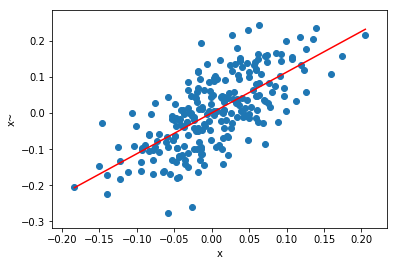

In [140]:
# single encode-decode
#

x = embed(1, D)
a = embed(1, D)
print np.var(x)
x_ = corr(a, conv(a, x))
print np.var(x_)

f = np.polyfit(x, x_, 1)
p = np.poly1d(f)

plt.scatter(x, x_)
plt.plot([min(x), max(x)], [p(min(x)), p(max(x))], color='red')
plt.xlabel('x')
plt.ylabel('x~')
plt.show()

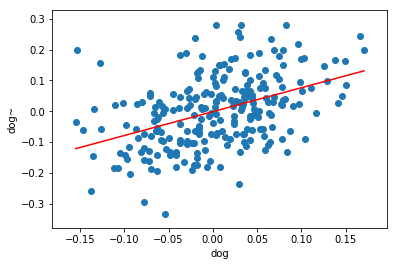

In [145]:
# Sam's example

dog = embed(1, D)
agent = embed(1, D)
cat = embed(1, D)
patient = embed(1, D)
chase = embed(1, D)
verb = embed(1, D)

def encode(a, b):
    return conv(b, a) # swap them to confuse everybody

# MOMCHIL note: notice that I'm not dividing by length(a)
# Sam does that because of his "spike" in the embeddigns which increases the variance
#
def decode(a, b):
    return corr(b, a) # swapped again

sentence = encode(dog,agent) + encode(chase,verb) + encode(cat,patient)
dog_decoded = decode(sentence,agent)


plt.scatter(dog, dog_decoded)

f = np.polyfit(dog, dog_decoded, 1)
p = np.poly1d(f)
plt.plot([min(dog), max(dog)], [p(min(dog)), p(max(dog))], color='red')
plt.xlabel('dog')
plt.ylabel('dog~')
plt.show()